# Guía 1
## Ejercicio 7

Genere distintas realizaciones de una señal aleatoria con distribución gaussiana (distribución normal, equivalente) con media cero y varianza unitaria, y luego utilice dichas realizaciones para verificar la estacionariedad y ergodicidad. PAra esto tenga en cuenta que los estimadores estadísticos (media y varianza, en este caso) requieren infinitas muestras y realizaciones para obtener el valor exacto, por lo tanto deberá observarse si los estimadores _tienden_ al mismo valor a medida que se incrementan la cantidad de muestras y realizaciones.

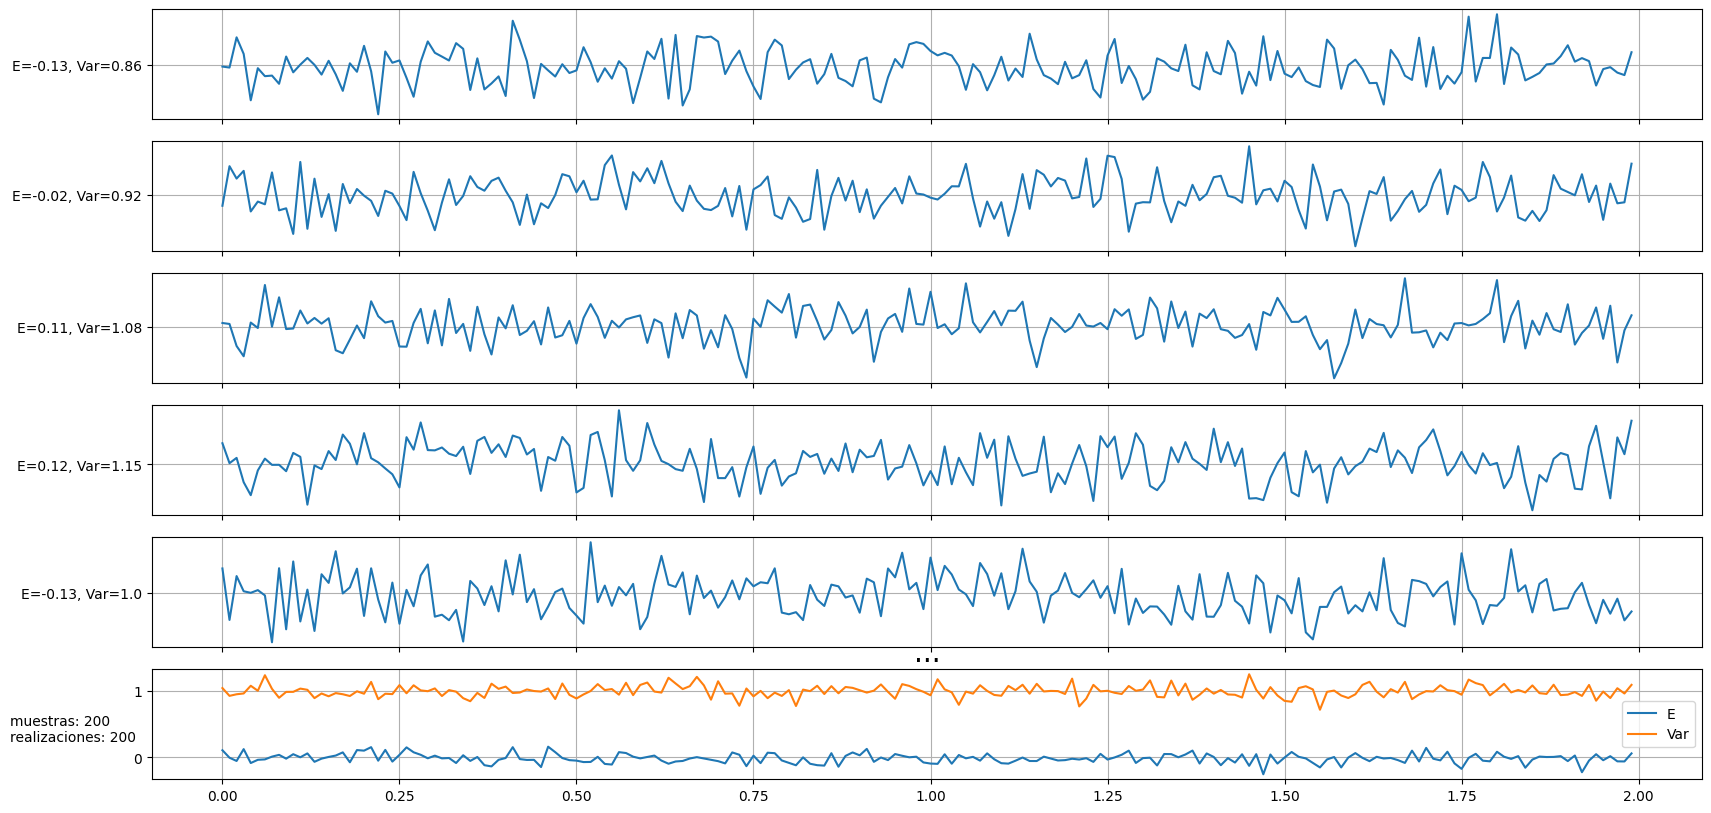

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Generador de una senial aleatoria
'''
def aleatoria(tini,tfin,fm):
    t = np.linspace(tini,tfin,fm*(tfin-tini), endpoint=False)
    return t, np.random.normal(0,1,len(t))

'''
Calcula la media de una senial
'''
def media(s):
    return np.sum(s)/len(s)

# ///////// PARAMETROS /////////
tini = 0
tfin = 2
fm = 100
realizaciones = 200
# //////////////////////////////

# Generamos las seniales aleatorias
t = [0] * (fm*(tini-tfin))
s = [[[0] * (fm*(tini-tfin))] for _ in range(realizaciones)]
for i in range(realizaciones):
    t, s[i] = aleatoria(tini,tfin,fm)

nGraficas = min(realizaciones,5)
fig,ax = plt.subplots(nGraficas+1,sharex=True)
fig.set_figwidth(20)
fig.set_figheight(10)

# Graficamos seniales aleatorias con media y varianza
for i in range(nGraficas):
    ax[i].grid()
    ax[i].plot(t,s[i])
    ax[i].set_yticks([0],[f"E={round(media(s[i]),2)}, Var={round(np.var(s[i]),2)}"])

# Calculamos media y varianza para ergodicidad
estacionariedadVar = np.var(s,0)
estacionariedadE = np.divide(np.sum(s,0), [len(t)]*len(t))

# Graficamos grafica media y varianza para ergodicidad
ax[nGraficas].grid()
ax[nGraficas].plot(t,estacionariedadE,label="E")
ax[nGraficas].plot(t,estacionariedadVar,label="Var")
ax[nGraficas].legend(fontsize=10)
ax[nGraficas].set_title("...", fontsize=20)
ax[nGraficas].text(-0.3, 0.2, f"muestras: {fm*(tfin-tini)}\nrealizaciones: {realizaciones}", fontsize=10, va='bottom')

plt.show()